# Métodos de agrupamiento

# Datos


In [190]:
!pip install yellowbrick
!pip install pandas
!pip install seaborn
!pip install plotly

## importa librerias


In [191]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px

# Preparacion de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neighbors import NearestNeighbors
from itertools import product

# Modelado
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Evaluacion
from sklearn.metrics import silhouette_score

# Advertencias
import warnings
warnings.filterwarnings('ignore')

# Analisis de variables


Procesamiento no supervisado


In [192]:
datos = pd.read_csv('/content/datos_segmentacion_clientes.csv', sep=';')
datos = datos.sample(4000) # tomando una muestra de 4000
datos.head()

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas
105804,41.9,4362448.6,5.0,713449.4,Muy_Alto,Bogotá,Recurrente,1717664,Mujer,Si,6
22969,30.7,8429917.6,7.0,822341.0,Bajo,Barranquilla,Nuevo,1099332,Hombre,Si,0
118510,40.1,6339134.0,8.0,758596.0,Medio,Bogotá,Nuevo,1021028,Mujer,Si,6
123547,35.5,4936254.4,8.0,416257.4,Muy_Bajo,Bogotá,Habitual,1018104,Mujer,Si,5
112487,49.7,5684393.1,8.0,608777.0,Medio,Medellín,Leal,584718,Hombre,No,3


## Completitud y toplogia de datos


In [193]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 105804 to 110613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                4000 non-null   float64
 1   Ingresos            4000 non-null   float64
 2   Numero_Compras      4000 non-null   float64
 3   Gastos              4000 non-null   float64
 4   Nivel_Satisfaccion  4000 non-null   object 
 5   Ubicacion           4000 non-null   object 
 6   Tipo_Cliente        4000 non-null   object 
 7   Monto_Compras       4000 non-null   int64  
 8   Genero              4000 non-null   object 
 9   Captado             4000 non-null   object 
 10  Cantidad_Quejas     4000 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 375.0+ KB


# EDA


1.  Univariado
2. Bivariado
3.
  Multivariado



## Estadistica descriptiva de los datos

In [194]:
datos.describe() # variables númericas

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas
count,4000.000000,4.000000e+03,4000.000000,4.000000e+03,4.000000e+03,4000.000000
mean,42.109500,5.738723e+06,6.980250,7.770226e+05,1.208734e+06,2.944500
std,5.021888,1.729675e+06,1.041456,2.378942e+05,4.352572e+05,2.010331
min,23.400000,1.250235e+06,4.000000,2.547016e+05,4.584840e+05,0.000000
25%,38.700000,4.513633e+06,6.000000,6.084476e+05,8.343720e+05,1.000000
50%,42.200000,5.478841e+06,7.000000,7.444093e+05,1.201616e+06,3.000000
75%,45.700000,6.715159e+06,8.000000,9.103664e+05,1.589653e+06,5.000000
max,64.200000,1.718866e+07,10.000000,2.688726e+06,1.958471e+06,6.000000


In [195]:
datos.describe(include='object') # variables categoricas

,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Genero,Captado
count,4000,4000,4000,4000,4000
unique,5,8,4,2,2
top,Bajo,Medellín,Nuevo,Mujer,Si
freq,1119,952,1793,2368,2836


# Exploración univariabda

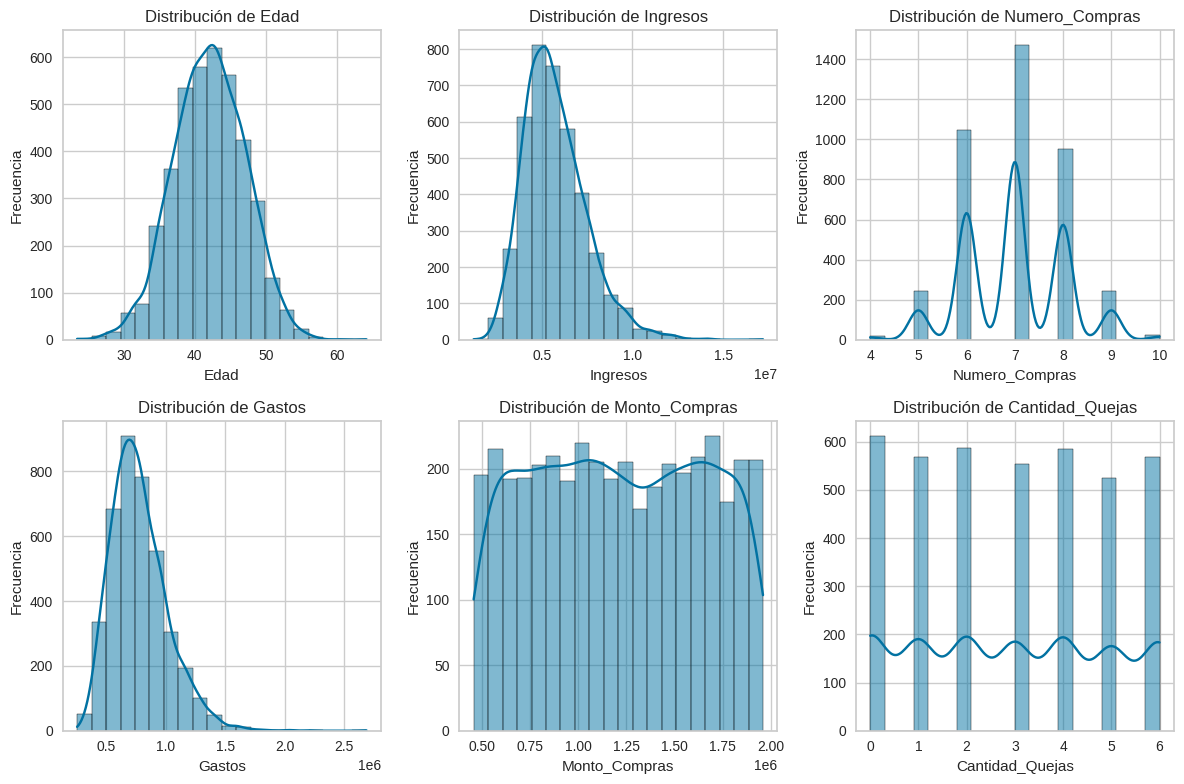

In [196]:
# Seleccionamos las columnas numéricas para el bucle
numeric_columns = ['Edad', 'Ingresos', 'Numero_Compras', 'Gastos', 'Monto_Compras', 'Cantidad_Quejas']

# Configuramos el tamaño del área de dibujo
plt.figure(figsize=(12, 8))

# Usamos un loop para iterar sobre las columnas numéricas y crear histogramas
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Crear subplots en una cuadrícula de 2 filas y 3 columnas
    sb.histplot(datos[column], bins=20, edgecolor='black',kde = True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

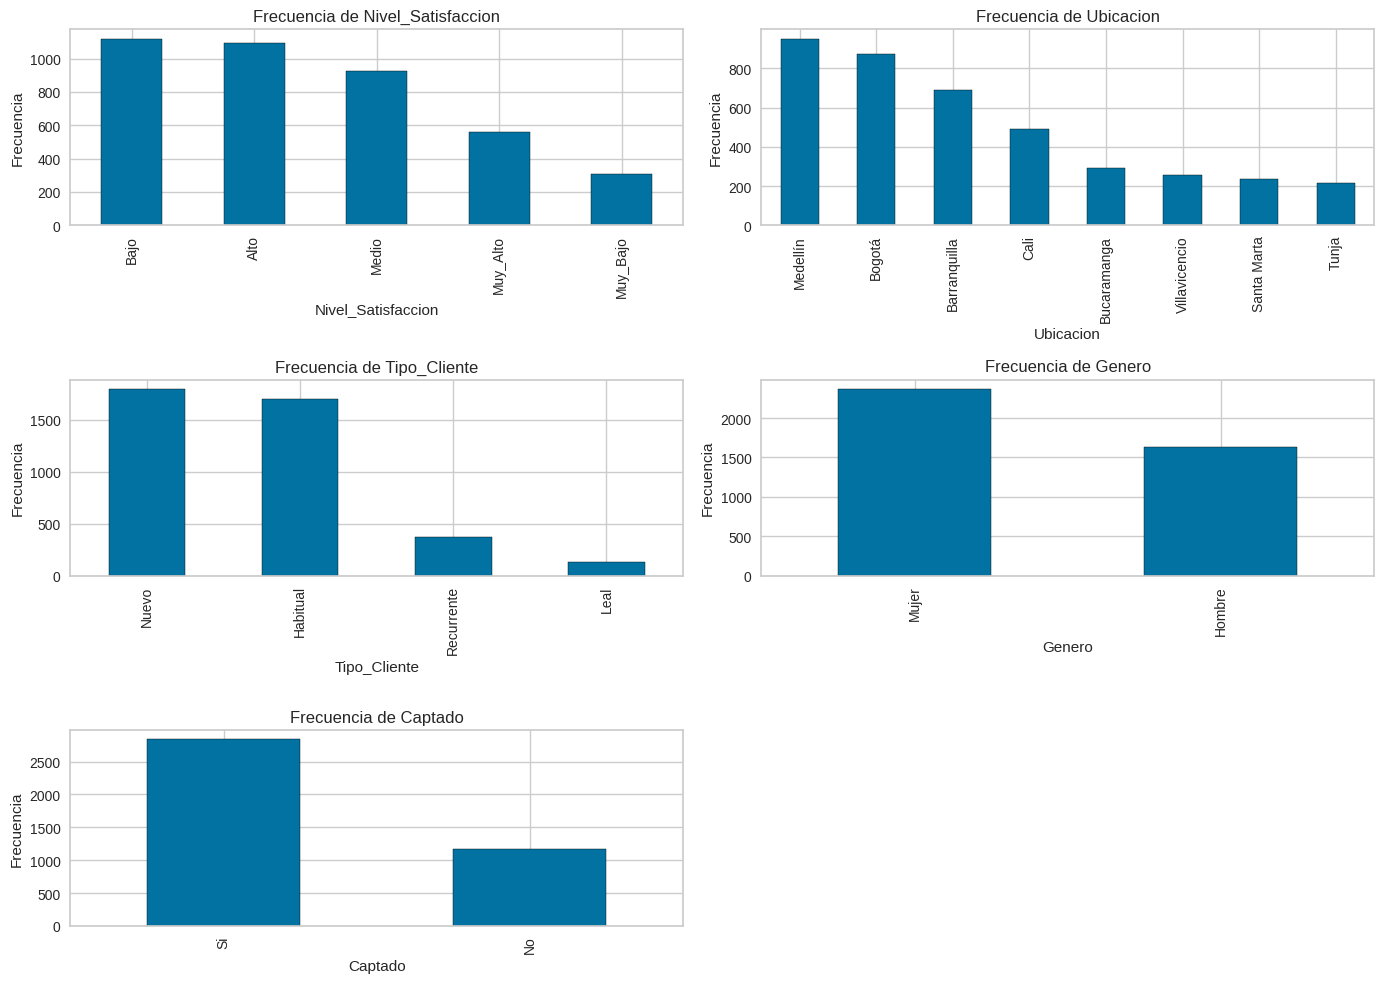

In [197]:
# Seleccionar las columnas categóricas para el bucle
categorical_columns = ['Nivel_Satisfaccion', 'Ubicacion', 'Tipo_Cliente', 'Genero', 'Captado']

# Configuramos el tamaño del área de dibujo
plt.figure(figsize=(14, 10))

# Usamos un loop para iterar sobre las columnas categóricas y crear gráficos de barras
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)  # Crear subplots en una cuadrícula de 3 filas y 2 columnas
    datos[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


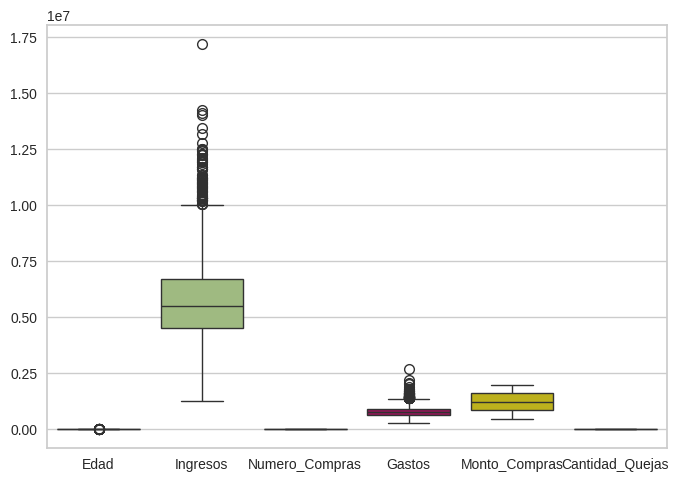

In [198]:
sb.boxplot(data = datos)
plt.show()

<Axes: xlabel='Cantidad_Quejas'>

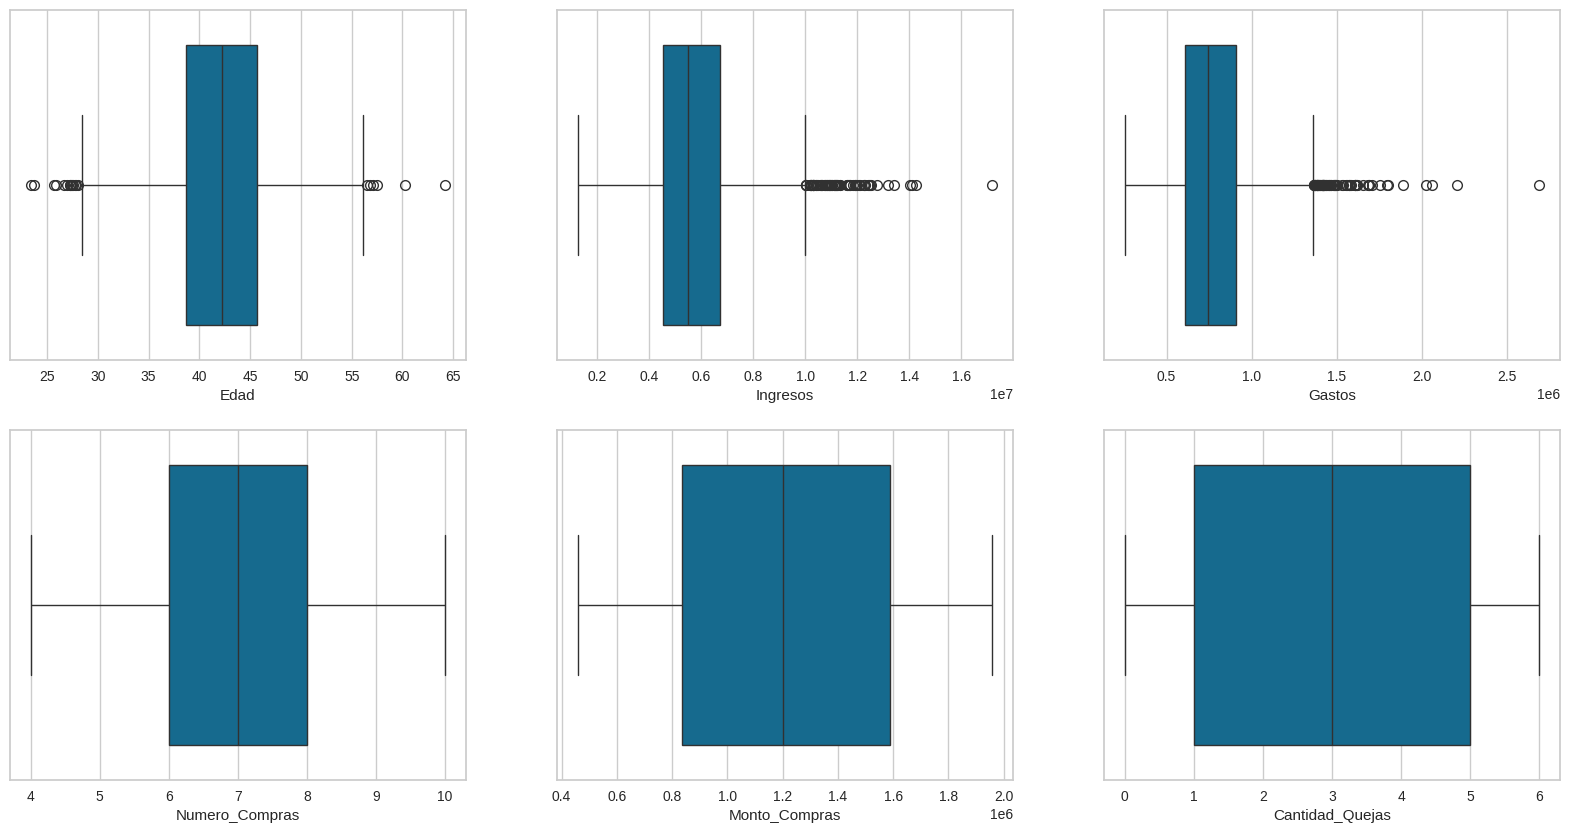

In [199]:
fig, ax = plt.subplots(2, 3, figsize= (20, 10))
sb.boxplot(data = datos, x = 'Ingresos', ax =ax[0,1])
sb.boxplot(data = datos, x = 'Edad', ax =ax[0,0])
sb.boxplot(data = datos, x = 'Gastos', ax =ax[0,2])
sb.boxplot(data = datos, x = 'Numero_Compras', ax =ax[1,0])
sb.boxplot(data = datos, x = 'Monto_Compras', ax =ax[1,1])
sb.boxplot(data = datos, x = 'Cantidad_Quejas', ax =ax[1,2])

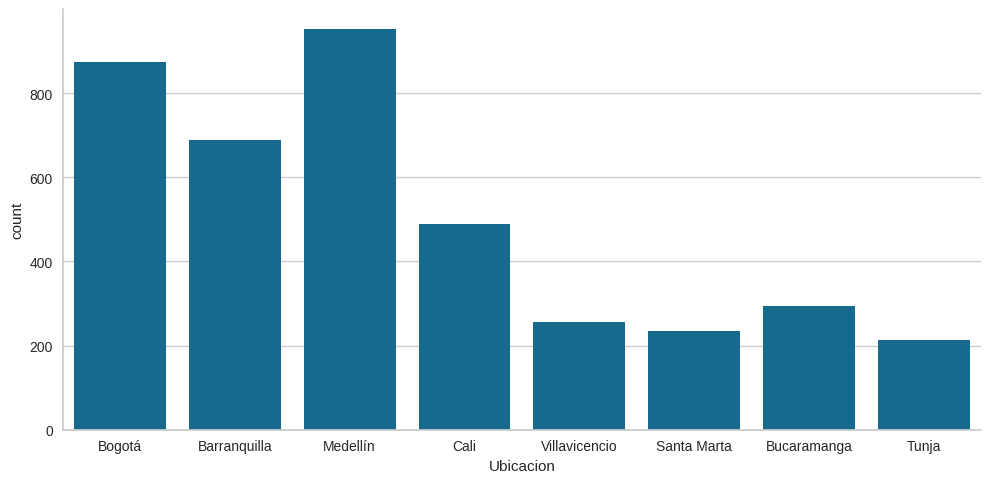

In [200]:
sb.catplot(data = datos, x = "Ubicacion", kind = 'count', aspect = 2)
plt.show()

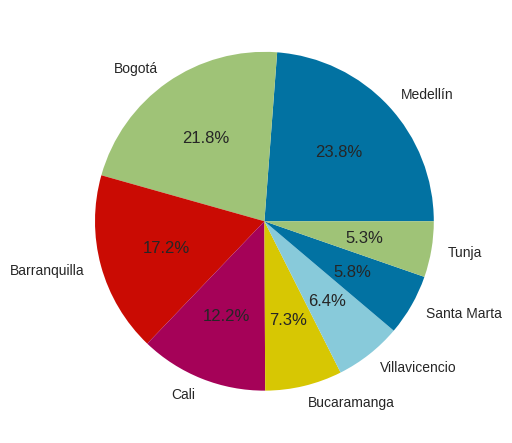

In [201]:
plt.pie(x = datos.Ubicacion.value_counts(), labels = datos.Ubicacion.value_counts().index, autopct = '%0.1f%%')
plt.show()

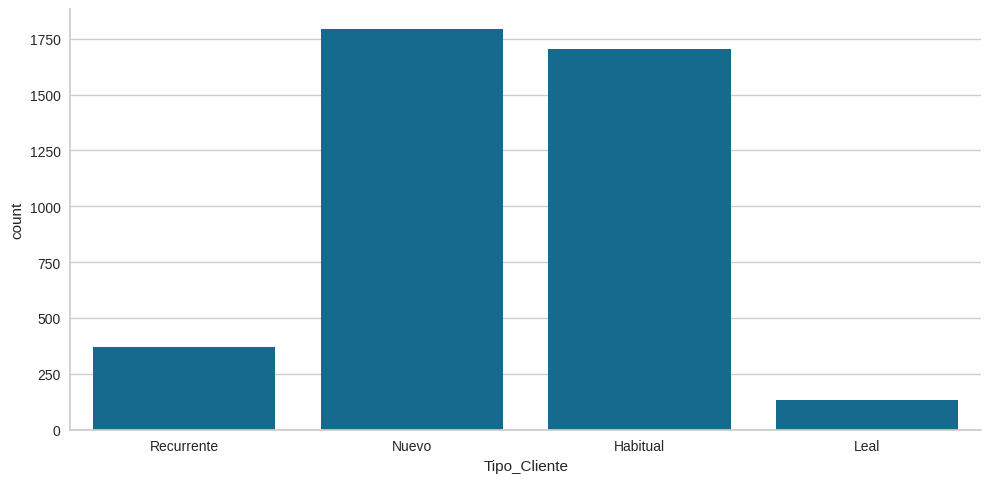

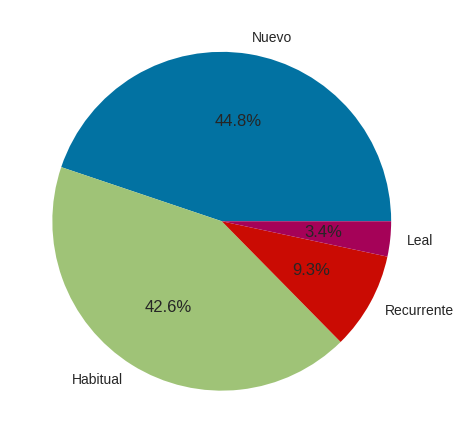

In [202]:
sb.catplot(data = datos, x = "Tipo_Cliente", kind = 'count', aspect = 2)
plt.show()
plt.pie(x = datos.Tipo_Cliente.value_counts(), labels = datos.Tipo_Cliente.value_counts().index, autopct = '%0.1f%%')
plt.show()

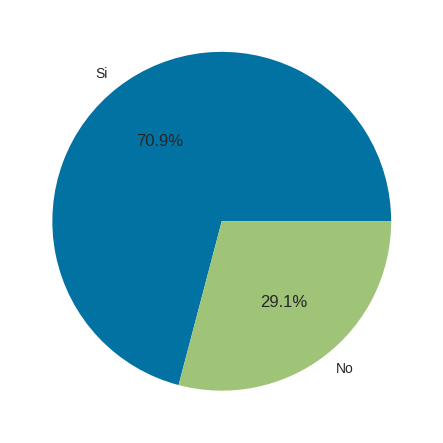

In [203]:
plt.pie(x = datos.Captado.value_counts(), labels=datos.Captado.value_counts().index, autopct = '%0.1f%%')
plt.show()

# Exploración Bivariada

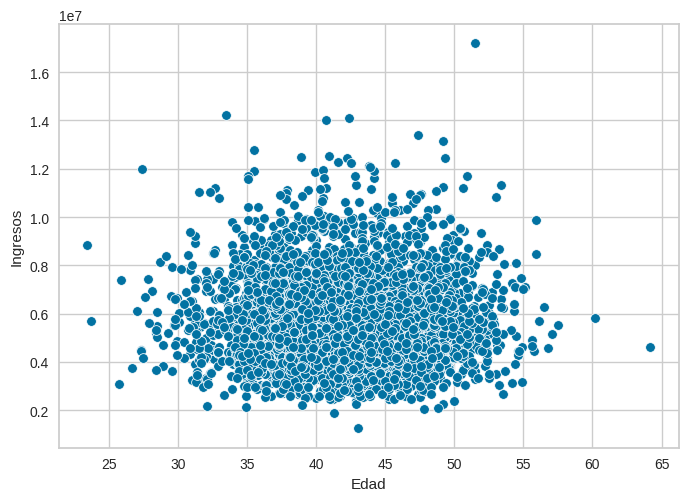

In [204]:
sb.scatterplot(data = datos, x = "Edad", y = "Ingresos")
plt.show()

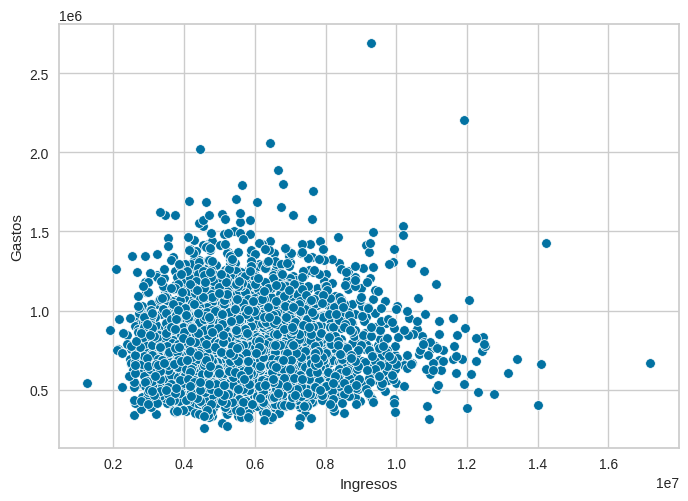

In [205]:
sb.scatterplot(data=datos, x = "Ingresos", y = "Gastos")
plt.show()

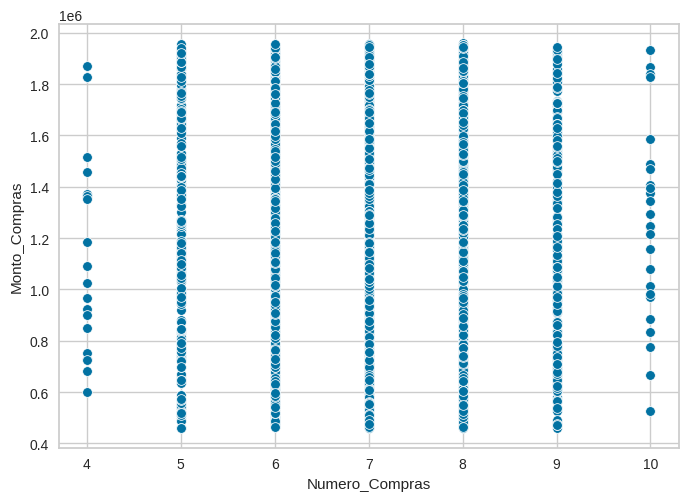

In [206]:
sb.scatterplot(data = datos, x= "Numero_Compras", y = "Monto_Compras")
plt.show()

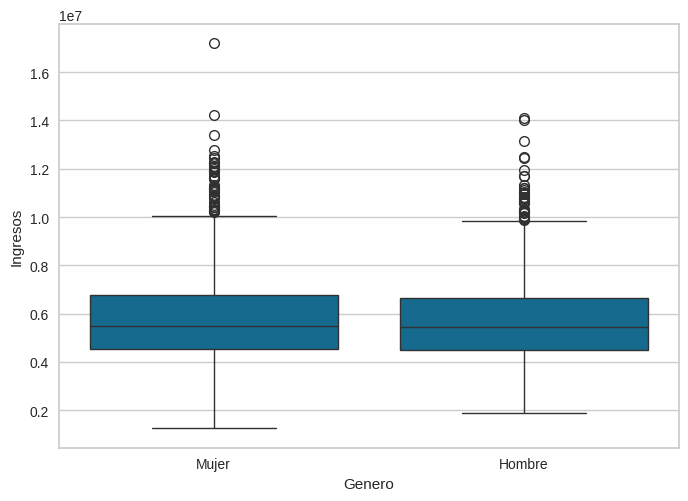

In [207]:
sb.boxplot(data=datos, x = "Genero", y = "Ingresos")
plt.show()

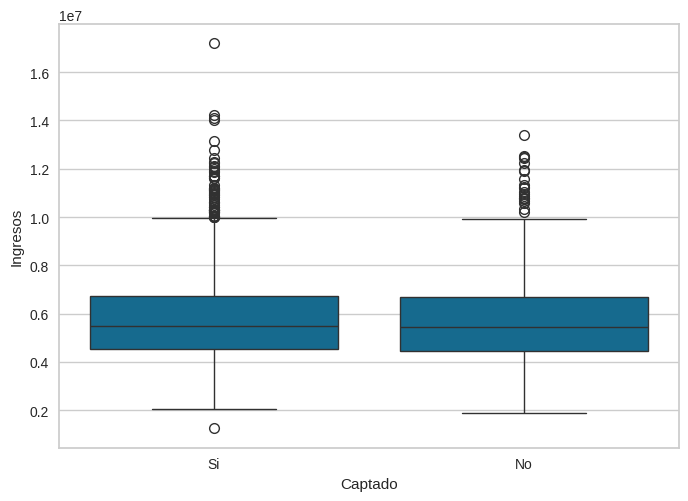

In [208]:
sb.boxplot(data=datos, x = "Captado", y = "Ingresos")
plt.show()

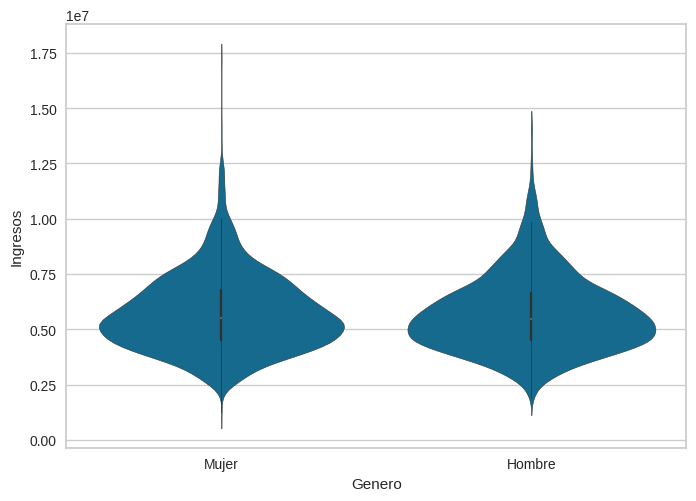

In [209]:
sb.violinplot(data= datos, x = "Genero", y = "Ingresos")
plt.show()

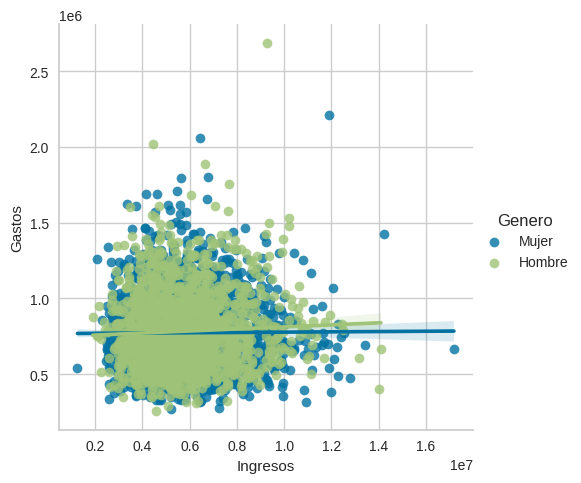

In [210]:
sb.lmplot(data= datos, x = "Ingresos", y = "Gastos", hue = "Genero")
plt.show()

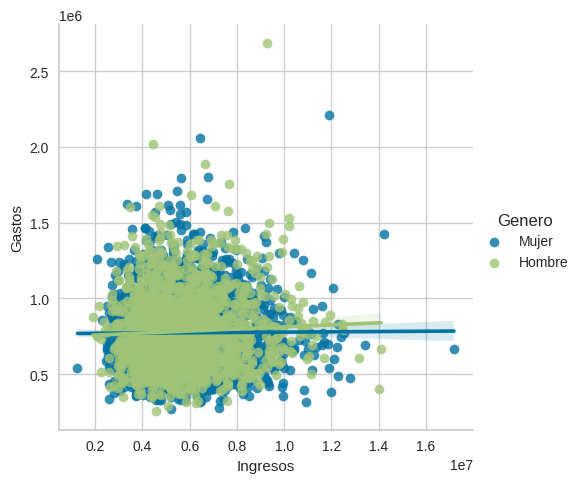

In [211]:
sb.lmplot(data= datos, x = "Ingresos", y = "Gastos", hue = "Genero")
plt.show()

In [212]:
fig = px.scatter_3d(data_frame = datos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Tipo_Cliente")
fig.show()

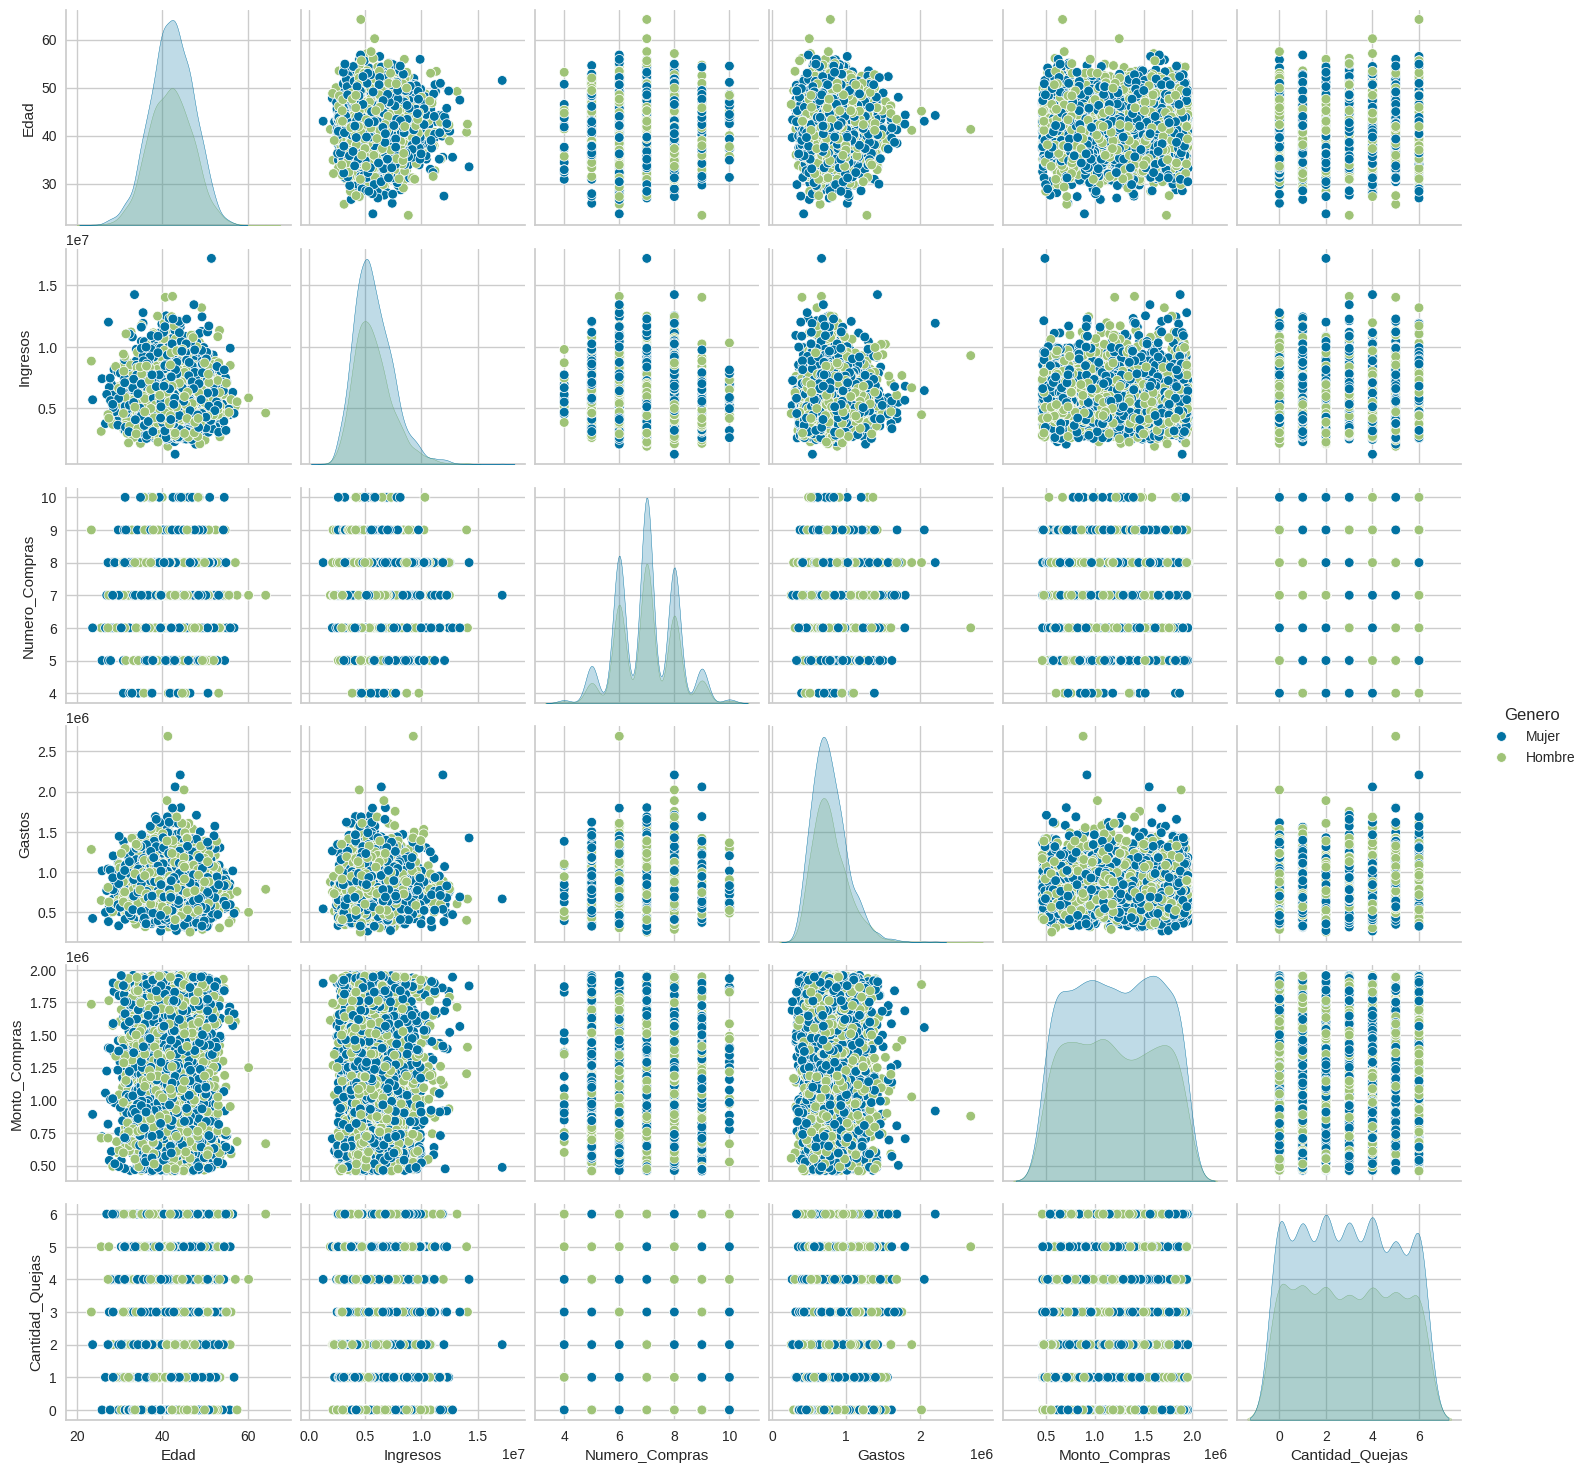

In [213]:
sb.pairplot(data = datos, hue = "Genero")
plt.show()

## correlación

Mapa de calor

Distancia esperada entre una variable y otra.  
Coeficiente de correlacion de Pearson [-1, 1].

Si el valor es muy cercano a zero, no hay correlación entre las variables

`heatmap`: Mapa de calor  
`annot`: mostrar los coeficientes

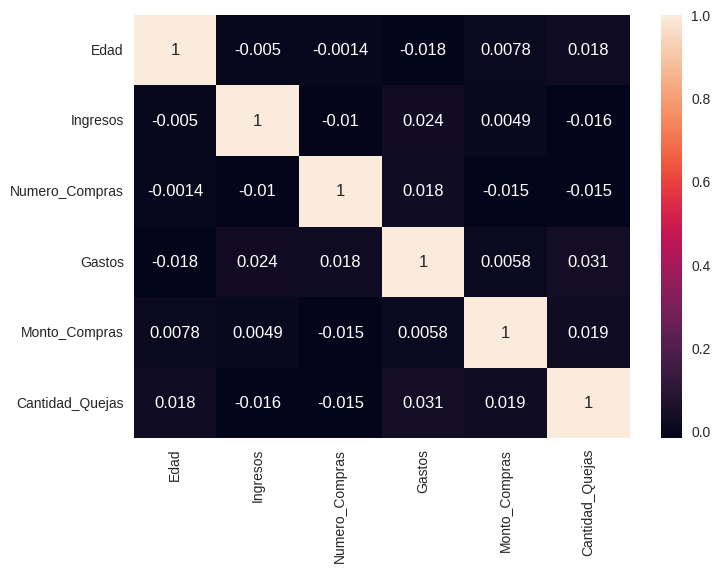

In [214]:
sb.heatmap(datos.corr(numeric_only = True), annot = True)
plt.show()

# Transformación de variables

## Preparación de los datos
`handle_unknown`: que hacer si se encuentra algo inesperado  
`remainder`: Que hacer con los datos que no se usen en los pipelines  
`remainder="passthrough"`

In [215]:
from sklearn.impute import SimpleImputer

Un **pipeline** en el contexto de *machine learning* y *data science* es una secuencia ordenada de pasos que procesan y transforman los datos para realizar una tarea determinada, como entrenar un modelo o hacer predicciones. `El objetivo principal de un pipeline es automatizar el flujo de trabajo y asegurar que todas las transformaciones se apliquen de manera consistente, especialmente cuando se realizan pasos de preprocesamiento, selección de características, y entrenamiento de modelos`.


**Conceptos clave de un pipeline:**

1. *Encapsulamiento de pasos:* Un pipeline encapsula una secuencia de transformaciones y pasos de modelado. Cada paso en el pipeline es una transformación (por ejemplo, imputar valores faltantes, escalar datos) o el ajuste de un modelo de machine learning.

2. *Reproducibilidad:* Garantiza que el mismo proceso se aplique tanto a los datos de entrenamiento como a los datos de prueba o a cualquier nuevo dato que se ingrese.

3. *Flujo de trabajo automatizado:* Los pipelines facilitan la organización del código y permiten automatizar tareas repetitivas, evitando errores en los procesos manuales.

`transformers`: Es una lista de transformaciones que se aplicarán a los subconjuntos de columnas que especifiques. Cada transformación está definida por una tupla de tres elementos:

**Nombre:** Un nombre cualquiera para identificar la transformación.

**Transformador:** La transformación que se aplicará, como escalado o codificación.

**Columnas:** Las columnas a las que se aplicará esa transformación.

In [216]:
# Separación de datos segun el tipo
numCols = datos.select_dtypes(include = ["float64", "int64"]).columns.to_list()
catCols = datos.select_dtypes(include = ["object"]).columns.to_list()

# Pipeline para las características numéricas: imputar y escalar
numTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    ('scaler', MinMaxScaler())  # Estandarizar las variables
])

# Pipeline para las características categóricas: imputar y codificar
catTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Combinar las transformaciones numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numTransformer, numCols),
        ('cat', catTransformer, catCols)
    ],remainder = 'passthrough')


set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Edad', 'Ingresos', 'Numero_Compras',
                                  'Gastos', 'Monto_Compras',
                                  'Cantidad_Quejas']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Nivel_Satisfaccion', 'Ubicacion',
                                  'Tipo_Cliente', 'Genero', 'Captado'])])

In [217]:
datosPre = preprocessor.fit_transform(datos)
codCat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat])
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.453431,0.195265,0.166667,0.188473,0.839461,1.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.178922,0.450464,0.500000,0.233210,0.427236,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.409314,0.319285,0.666667,0.207021,0.375033,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.296569,0.231266,0.666667,0.066374,0.373083,0.833333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.644608,0.278206,0.666667,0.145469,0.084157,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.348039,0.405198,0.000000,0.183802,0.176964,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3996,0.455882,0.177410,0.333333,0.177349,0.668507,0.166667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3997,0.458333,0.394867,0.333333,0.262531,0.091794,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3998,0.399510,0.242269,0.500000,0.242342,0.555251,0.666667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [226]:
datosPro.describe()

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000
mean,0.458566,0.281614,0.496708,0.214592,0.500171,0.490750,0.273000,0.279750,0.231000,0.139500,...,0.05325,0.064000,0.42550,0.033500,0.448250,0.092750,0.408000,0.592000,0.29100,0.70900
std,0.123085,0.108522,0.173576,0.097737,0.290174,0.335055,0.445557,0.448932,0.421525,0.346511,...,0.22456,0.244784,0.49448,0.179961,0.497377,0.290118,0.491525,0.491525,0.45428,0.45428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.375000,0.204750,0.333333,0.145334,0.250594,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.460784,0.265309,0.500000,0.201193,0.495426,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.00000
75%,0.546569,0.342877,0.666667,0.269375,0.754119,0.833333,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [219]:
datosPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Edad                         4000 non-null   float64
 1   Ingresos                     4000 non-null   float64
 2   Numero_Compras               4000 non-null   float64
 3   Gastos                       4000 non-null   float64
 4   Monto_Compras                4000 non-null   float64
 5   Cantidad_Quejas              4000 non-null   float64
 6   Nivel_Satisfaccion_Alto      4000 non-null   float64
 7   Nivel_Satisfaccion_Bajo      4000 non-null   float64
 8   Nivel_Satisfaccion_Medio     4000 non-null   float64
 9   Nivel_Satisfaccion_Muy_Alto  4000 non-null   float64
 10  Nivel_Satisfaccion_Muy_Bajo  4000 non-null   float64
 11  Ubicacion_Barranquilla       4000 non-null   float64
 12  Ubicacion_Bogotá             4000 non-null   float64
 13  Ubicacion_Bucarama

# Construcción de los Modelos de agrupación

## K-Means

K: la cantidad de los grupos sobre los cuales se va a realizar la separacion de los grupos

Pasos:
1. Definir el valor de K
2. Crear aleatoriamente K centros de grupos
3. Calcular la distancia de cada centro a todos los individuos (Euclidiana, Manhattan, Correlacion, Coseno, coeficiente de ajuste simple, etc.)
4. Determinar pertenencia de cada individuo a un centro por menor distancia
5. Se recalcula el valor del centro, es el promedio de todas las variables de los individuos que en ese momento pertenecen al grupo
6. Repetir los pasos 3, 4, 5 hasta que la diferencia del cambio de centros sea minima.

Existen varias formas para definir el valor de K:
- Tecnica del codo: Calcula la inercia (distancia media) de los individuos de un grupo, moviendo el valor para K. Resulta en un grafico con ($x = K, y = inercia$) con curva descendiente.

- Indice de silhouette: $ S_i = \frac{b_i - a_i}{max(a_i, b_i} $

#### Metodo del Codo

`K`: el rango para considerar `k`  
`KMeans`:  
- `n_clusters`: el numero de grupos en la iteracion
- `random_state`: semilla para el aleatorio


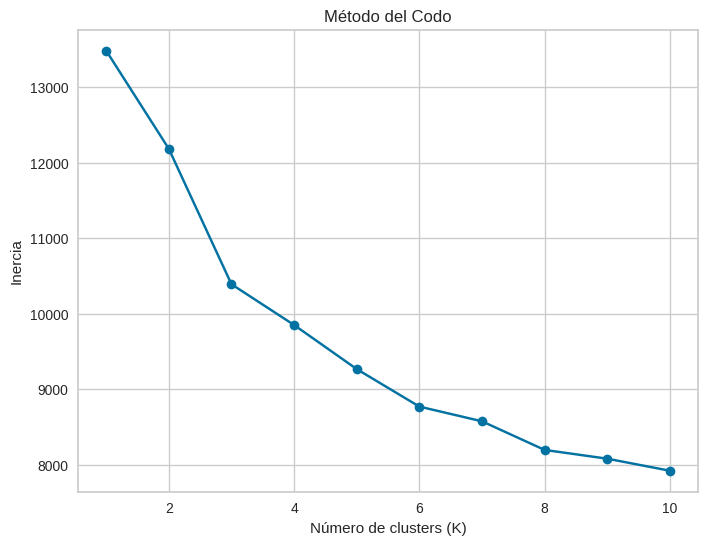

In [220]:
# # Lista para almacenar la inercia (Suma de distancias al cuadrado a los centroides)
inertia = []

# Probar diferentes valores de K (número de clusters)
K_range = range(1, 11)  # Vamos a probar con entre 1 y 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datosPro)  # datosPro es el DataFrame preprocesado
    inertia.append(kmeans.inertia_)  # Guardar la inercia para cada K

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

Observando el gráfico, el punto alrededor de $K = 3$ o $K = 4$ parece ser donde el cambio en la pendiente es más pronunciado.

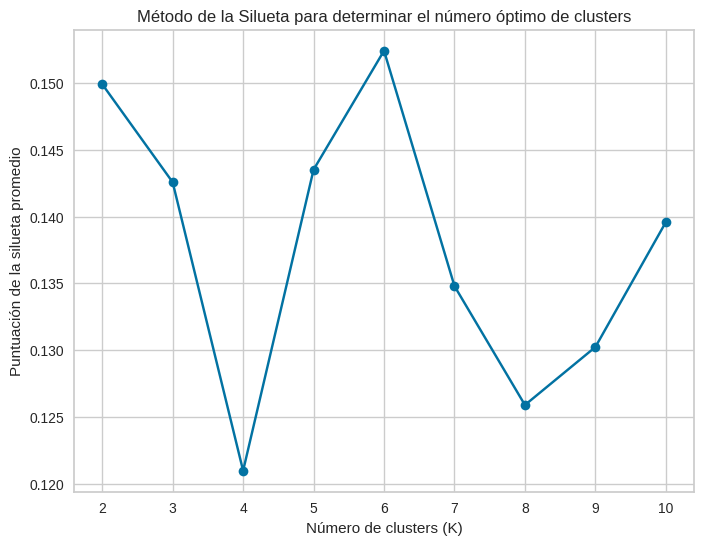

In [221]:
# Lista para almacenar la puntuación de la silueta promedio para cada K
silhouette_scores = []

# Probar diferentes valores de K (número de clusters)
K_range = range(2, 11)  # Empezamos desde 2 clusters (no tiene sentido calcular para 1 cluster)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(datosPro)  # Obtener las etiquetas de los clusters
    silhouette_avg = silhouette_score(datosPro, labels)  # Calcular la puntuación promedio de la silueta
    silhouette_scores.append(silhouette_avg)  # Guardar el resultado

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Puntuación de la silueta promedio')
plt.title('Método de la Silueta para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

**Análisis del gráfico:**

1. *K = 2:*  Tiene la puntuación de silueta más alta (0.082). Esto indica que cuando el algoritmo agrupa los datos en 2 clusters, los puntos están bien agrupados y separados entre los dos clusters.

2. K = 3: Aquí, la puntuación de silueta cae significativamente, indicando que el agrupamiento en 3 clusters no proporciona una mejor separación ni cohesión comparado con 2 clusters.


3. K = 4 a 7: Hay una mejora moderada en K = 4 y K = 6, pero no superan la calidad de los clusters con K = 2. Las puntuaciones están alrededor de 0.074-0.076, lo que indica una ligera mejora, pero no una solución tan óptima como K = 2.

5. K = 8 a 10: La puntuación de la silueta cae drásticamente, indicando que a partir de K = 8 la calidad de los clusters empeora significativamente. Los clusters están peor definidos, con una peor separación y cohesión.

# Modelo


In [222]:
modelo_final = KMeans(n_clusters = 6, random_state=123, n_init=25)
modelo_final.fit(datosPro)
grupos = modelo_final.predict(datosPro)
datosGrupos = datos
datosGrupos["Grupo KMeans"] = grupos

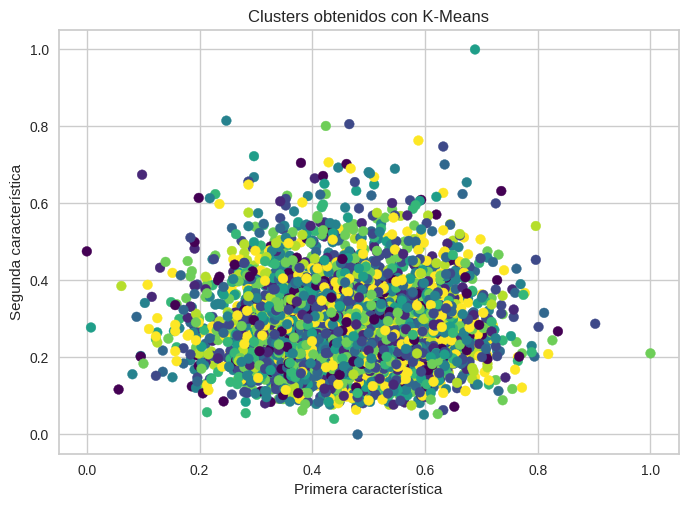

In [223]:
# definir los k cluster
k= 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
kmeans.fit(datosPro)
grupos = kmeans.predict(datosPro)
datosGrupos = datos
datosGrupos["Grupo KMeans"] = grupos
# Visualización de los clusters (si los datos tienen dos o tres dimensiones)
plt.scatter(datosPro.iloc[:, 0], datosPro.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Clusters obtenidos con K-Means')
plt.xlabel('Primera característica')
plt.ylabel('Segunda característica')
plt.show()

In [224]:
centros = pd.DataFrame(kmeans.cluster_centers_, columns=datosPro.columns)
centros.columns = np.concatenate([numCols, codCat])
centros

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion_Alto,Nivel_Satisfaccion_Bajo,Nivel_Satisfaccion_Medio,Nivel_Satisfaccion_Muy_Alto,...,Ubicacion_Tunja,Ubicacion_Villavicencio,Tipo_Cliente_Habitual,Tipo_Cliente_Leal,Tipo_Cliente_Nuevo,Tipo_Cliente_Recurrente,Genero_Hombre,Genero_Mujer,Captado_No,Captado_Si
0,0.452793,0.283323,0.499830,0.212157,0.501689,0.490844,0.247202,0.340793,0.252289,0.099695,...,0.041709,0.059003,3.885781e-16,4.374364e-02,8.514751e-01,1.047813e-01,-1.831868e-15,1.000000e+00,2.775558e-15,1.000000e+00
1,0.455501,0.281132,0.502044,0.216919,0.493971,0.483962,0.313208,0.261321,0.204717,0.141509,...,0.045283,0.055660,4.613208e-01,3.490566e-02,4.330189e-01,7.075472e-02,1.000000e+00,6.661338e-15,2.775558e-15,1.000000e+00
2,0.466490,0.283161,0.496217,0.210425,0.509821,0.500631,0.269861,0.336696,0.282472,0.083228,...,0.016393,0.030265,1.000000e+00,-7.632783e-17,6.439294e-15,-1.665335e-16,1.443290e-15,1.000000e+00,2.664535e-15,1.000000e+00
3,0.460835,0.279557,0.489548,0.217366,0.497961,0.490120,0.260309,0.206186,0.201890,0.209622,...,0.095361,0.098797,3.608247e-01,4.639175e-02,4.269759e-01,1.658076e-01,4.914089e-01,5.085911e-01,1.000000e+00,1.842970e-14


# destransformar el modelo


In [225]:
numInverseTransformer = preprocesador.named_transformers_["num"]["scaler"]
catInverseTransformer = preprocesador.named_transformers_["cat"]["onehot"]

centNumInvTrans = numInverseTransformer.inverse_transform(centros[numCols])
centCatInvTrans = catInverseTransformer.inverse_transform(centros[codCat])

centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans, centCatInvTrans], axis = 1), columns=np.concatenate([numCols, catCols]))
centros_transformados

,Edad,Ingresos,Numero_Compras,Gastos,Monto_Compras,Cantidad_Quejas,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Genero,Captado
0,38.998623,7756714.354572,7.498813,706764.353701,1211267.048339,2.945066,Bajo,Medellín,Nuevo,Mujer,Si
1,39.099081,7712230.335279,7.514308,716506.793114,1199689.036716,2.903774,Alto,Medellín,Habitual,Hombre,Si
2,39.506774,7753413.373221,7.473518,703220.093039,1223466.162446,3.003783,Bajo,Medellín,Habitual,Mujer,Si
3,39.296973,7680251.403693,7.426833,717421.00729,1205674.624297,2.940722,Alto,Bogotá,Nuevo,Mujer,No


In [227]:
datosGrupos

,Edad,Ingresos,Numero_Compras,Gastos,Nivel_Satisfaccion,Ubicacion,Tipo_Cliente,Monto_Compras,Genero,Captado,Cantidad_Quejas,Grupo KMeans
105804,41.9,4362448.6,5.0,713449.4,Muy_Alto,Bogotá,Recurrente,1717664,Mujer,Si,6,0
22969,30.7,8429917.6,7.0,822341.0,Bajo,Barranquilla,Nuevo,1099332,Hombre,Si,0,1
118510,40.1,6339134.0,8.0,758596.0,Medio,Bogotá,Nuevo,1021028,Mujer,Si,6,0
123547,35.5,4936254.4,8.0,416257.4,Muy_Bajo,Bogotá,Habitual,1018104,Mujer,Si,5,2
112487,49.7,5684393.1,8.0,608777.0,Medio,Medellín,Leal,584718,Hombre,No,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
109974,37.6,7708451.1,4.0,702080.5,Medio,Santa Marta,Nuevo,723927,Mujer,No,0,3
19489,42.0,4077874.3,6.0,686372.6,Alto,Cali,Nuevo,1461236,Mujer,Si,1,0
121196,42.1,7543789.9,6.0,893708.8,Muy_Bajo,Medellín,Recurrente,596174,Mujer,Si,1,0
74590,39.7,5111615.0,7.0,844568.5,Medio,Bogotá,Nuevo,1291354,Mujer,No,4,3


In [228]:
datosGrupos["Grupo KMeans"].value_counts()

,count
Grupo KMeans,
3,1164
1,1060
0,983
2,793


In [230]:
fig = px.scatter_3d(data_frame = datosGrupos, x = "Ingresos", y = "Gastos", z = "Edad", color = "Grupo KMeans")
fig.show()

# Agrupamiento Jerarquico

## Agrupamiento jerarquico
_Algoritmo jerarquico aglomerativo_:
1. Determinar que cada individuo es un grupo.
2. Calcular la distancia entre cada **grupo**
3. Unir grupos mediante la menor distancia.
4. Repite los pasos 2 y 3 hasta que todos los individuos sean un grupo
5. Dibuja un dendograma
6. Se determina la cantidad de grupos por corte del dendograma


**Metrica de asociacion**
1. Completa o Maxima: Se calculan todas las posibles distancias de los miembros entre los grupos, y se usa la maxima.
2. Simple o Minima: Se calculan todas las posibles distancias de los miembros entre los grupos y se usa la minima.
3. Promedio: se calcula todas las posibles distancias de los miembros entre los grupos y se usa el promedio de esas distancias
4. Asociacion por Triangulacion :
  - *WARD* Maxima variaza _(mas usado)_: Definir un centro y se calcula la distancia entre los grupos

In [233]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.9 MB/s eta 0:00:00


In [235]:
from sklearn_extra.cluster import KMedoids

In [236]:
# Ajustar el modelo K-Medoids
modelo_kmedoids = KMedoids(n_clusters=6, random_state=123, method='pam')  # K-Medoids con 6 clusters
modelo_kmedoids.fit(datosPro)  # Ajustamos el modelo

KMedoids(method='pam', n_clusters=6, random_state=123)